# Introduction to Dynamic Programming 4 

In [ ]:
# init

# 221. Maximal Square

#### Difficulty: Medium

---

### **Problem Statement**

Given an `m x n` binary matrix filled with `0's` and `1's`, find the largest square containing only `1's` and return its area.

---

### **Examples**

#### Example 1:

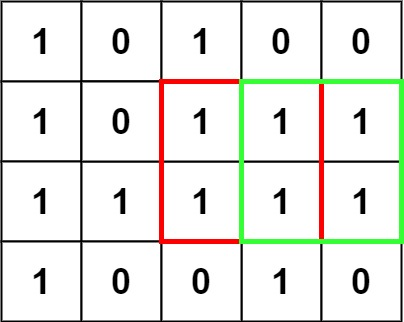

**Input**:  
```plaintext
matrix = [
    ["1","0","1","0","0"],
    ["1","0","1","1","1"],
    ["1","1","1","1","1"],
    ["1","0","0","1","0"]
]
```
**Output**:  
```plaintext
4
```

---

#### Example 2:

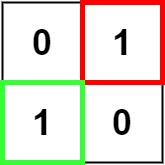

**Input**:  
```plaintext
matrix = [["0","1"],["1","0"]]
```
**Output**:  
```plaintext
1
```

---

#### Example 3:
**Input**:  
```plaintext
matrix = [["0"]]
```
**Output**:  
```plaintext
0
```

---

### **Constraints**

- `m == matrix.length`  
- `n == matrix[i].length`  
- `1 <= m, n <= 300`  
- `matrix[i][j]` is `'0'` or `'1'`.

```

In [ ]:
class Solution(object):
    def maximalSquare(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        # Dimensions of the matrix
        rows, cols = len(matrix), len(matrix[0])
        cache = {}  # Map each (r, c) -> max side length of square

        def helper(r, c):
            # If we are out of bounds, return 0
            if r >= rows or c >= cols:
                return 0
            
            # Use cached result if already computed
            if (r, c) not in cache:
                down = helper(r + 1, c)
                right = helper(r, c + 1)
                diag = helper(r + 1, c + 1)

                # Compute the square size only if the current cell is '1'
                cache[(r, c)] = 0
                if matrix[r][c] == '1':
                    cache[(r, c)] = 1 + min(down, right, diag)
            
            return cache[(r, c)]

        # Start from the top-left corner
        helper(0, 0)
        
        # Return the area of the largest square
        return max(cache.values()) ** 2


In [ ]:
class Solution(object):
    def maximalSquare(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """

        rows = len(matrix)
        cols = len(matrix[0]) if rows else 0
        maxsqlen = 0

        dp = [0] * (cols + 1)
        prev = 0
        for i in range(1, rows + 1):
            
            for j in range(1, cols + 1):
                temp = dp[j]
                if matrix[i-1][j-1] == '1':
                    dp[j] = min(dp[j], dp[j-1], prev) + 1
                    maxsqlen = max(maxsqlen, dp[j])
                else:
                    dp[j] = 0
                prev = temp
        return maxsqlen ** 2

        

# 5. Longest Palindromic Substring

#### Difficulty: Medium

## Problem Description

Given a string `s`, return the **longest palindromic substring** in `s`.

---

### Examples

**Example 1:**

Input:  
`s = "babad"`  
Output:  
`"bab"`  
Explanation: `"aba"` is also a valid answer.

**Example 2:**

Input:  
`s = "cbbd"`  
Output:  
`"bb"`

---

### Constraints
- `1 <= s.length <= 1000`
- `s` consists of only digits and English letters.


In [ ]:
# 396ms
class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        result = ""
        resultLen = 0

        for i in range(len(s)):
            # Odd-length palindromes
            # l = left, t = right
            l, r = i, i
            while l >= 0 and r < len(s) and s[l] == s[r]:
                if (r - l + 1) > resultLen:
                    result = s[l:r+1]
                    resultLen = r - l + 1
                l -= 1
                r += 1

            # Even-length palindromes
            l, r = i, i + 1
            while l >= 0 and r < len(s) and s[l] == s[r]:
                if (r - l + 1) > resultLen:
                    result = s[l:r+1]
                    resultLen = r - l + 1
                l -= 1
                r += 1

        return result

In [ ]:
# 7720 ms
class Solution(object):
    def longestPalindrome(self, s):
        if len(s) <=1:
            return s
        Max_Len=1
        Max_Str=s[0]
        for i in range(len(s)-1):
            for j in range(i+1,len(s)):
                if j-i+1 > Max_Len and s[i:j+1] == s[i:j+1][::-1]:
                    Max_Len = j-i+1
                    Max_Str = s[i:j+1]
        return Max_Str

        

# 139. Word Break

#### Difficulty: Medium

## Problem Statement
Given a string `s` and a dictionary of strings `wordDict`, return `true` if `s` can be segmented into a space-separated sequence of one or more dictionary words.

Note that the same word in the dictionary may be reused multiple times in the segmentation.

---

## Examples

### Example 1
**Input**:  
`s = "leetcode"`  
`wordDict = ["leet","code"]`  

**Output**:  
`true`  

**Explanation**:  
Return `true` because `"leetcode"` can be segmented as `"leet code"`.

---

### Example 2
**Input**:  
`s = "applepenapple"`  
`wordDict = ["apple","pen"]`  

**Output**:  
`true`  

**Explanation**:  
Return `true` because `"applepenapple"` can be segmented as `"apple pen apple"`.  
Note that you are allowed to reuse a dictionary word.

---

### Example 3
**Input**:  
`s = "catsandog"`  
`wordDict = ["cats","dog","sand","and","cat"]`  

**Output**:  
`false`  

---

## Constraints
- 1 <= `s.length <= 300`
- 1 <= `wordDict.length <= 1000`
- 1 <= `wordDict[i].length <= 20`
- s and `wordDict[i]` consist of only lowercase English letters.
- All the strings of `wordDict` are unique.
